In [1]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [3]:
# Filter Philippine data
philippine_data = data[
    data['economy'] == 'Philippines'
]

In [40]:
type(digital_grouped_data)

pandas.core.frame.DataFrame

In [5]:
data['fin14'] = data['fin14a'] + data['fin14b']
data

#Filter mobile/internet access (FI access)
data['has_digital access'] = data['fin14'].apply(
    lambda x:1 if (x >= 1 and x <= 3) else 0
)

digital_grouped_data = data.groupby(['economy','regionwb']).agg(
 with_digitalaccess=('has_digital access', 'sum'),
 total_population=('wpid_random', 'count'))

digital_grouped_data['percent of banked with digital access'] = digital_grouped_data['with_digitalaccess'] * 100.0 / digital_grouped_data['total_population']
digital_grouped_data = digital_grouped_data.reset_index()  

SEA_data = digital_grouped_data[digital_grouped_data['regionwb']=='East Asia & Pacific (excluding high income)']
SEA_data = SEA_data.sort_values('percent of banked with digital access', ascending=[False])
SEA_data

,economy,regionwb,with_digitalaccess,total_population,percent of banked with digital access
80,Malaysia,East Asia & Pacific (excluding high income),422,1004,42.031873
25,China,East Asia & Pacific (excluding high income),1179,3627,32.506203
139,Vietnam,East Asia & Pacific (excluding high income),202,1002,20.159681
87,Mongolia,East Asia & Pacific (excluding high income),168,1000,16.800000
125,Thailand,East Asia & Pacific (excluding high income),132,1000,13.200000
55,Indonesia,East Asia & Pacific (excluding high income),113,1000,11.300000
104,Philippines,East Asia & Pacific (excluding high income),88,1000,8.800000
69,Lao PDR,East Asia & Pacific (excluding high income),66,1000,6.600000
19,Cambodia,East Asia & Pacific (excluding high income),47,1600,2.937500
91,Myanmar,East Asia & Pacific (excluding high income),46,1600,2.875000


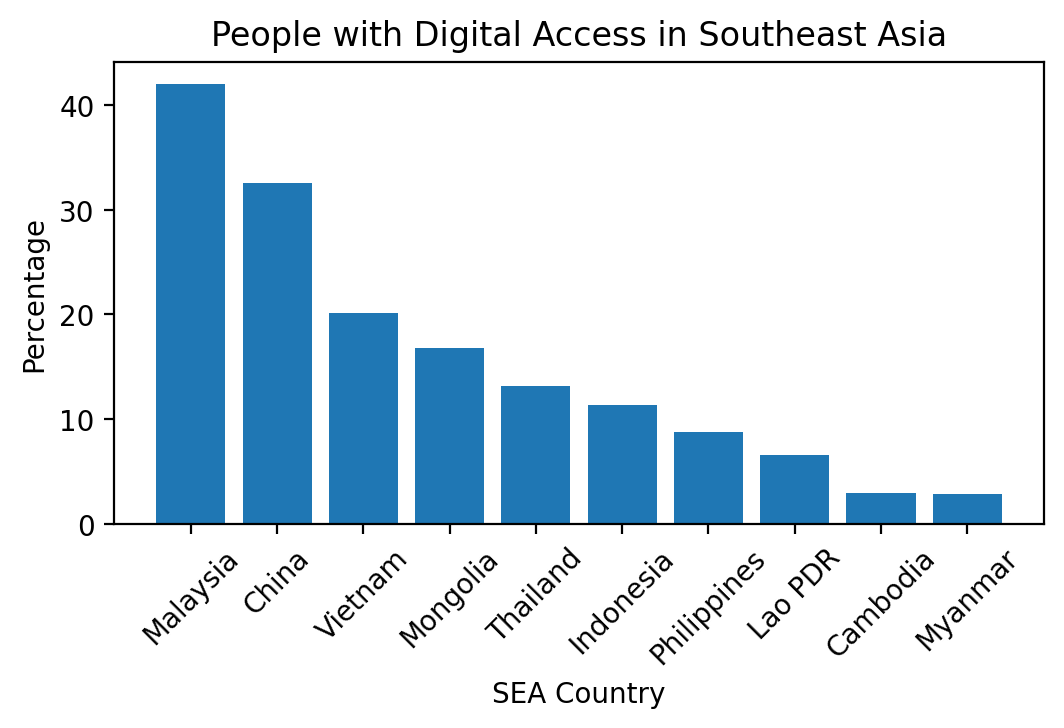

In [6]:
plt.figure(figsize=(6,3)  , dpi=200)
plt.bar(
    SEA_data['economy'],
    SEA_data['percent of banked with digital access']
)
plt.title("People with Digital Access in Southeast Asia")

# Set labels
plt.xlabel('SEA Country')
plt.ylabel('Percentage')

plt.xticks(rotation=45)
plt.show()


In [14]:
PH_data = data[data['economy']=='Philippines']
PH_data

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy,fin14,has_digital access
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,2,4.0,2,3.0,0.0,NaN,0.0,NaN,4,0
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,4,4.0,4,1.0,0.0,0.0,1.0,1.0,3,1
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,2,4.0,2,5.0,0.0,NaN,0.0,NaN,4,0
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4,4.0,2,5.0,0.0,NaN,0.0,NaN,4,0
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,4,2.0,2,1.0,0.0,NaN,0.0,NaN,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,151988960,1.249522,1,27.0,2.0,1,...,4,2.0,2,5.0,0.0,NaN,0.0,NaN,4,0
115288,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,138300933,0.697020,1,68.0,1.0,1,...,4,4.0,4,5.0,0.0,NaN,0.0,NaN,4,0
115289,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,134514859,2.614345,2,18.0,2.0,4,...,4,4.0,4,2.0,0.0,0.0,1.0,1.0,3,1
115290,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,145841428,1.916246,1,20.0,2.0,4,...,4,4.0,2,2.0,0.0,NaN,0.0,NaN,4,0


In [19]:
data['Digital Access'] = data['has_digital access'].apply(
    lambda x:'Yes' if (x >= 1 and x <= 3) else 'No'
)


In [20]:
PH_data = data[data['economy']=='Philippines']
PH_data

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy,fin14,has_digital access,Digital Access
114292,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,180129353,0.261434,2,66.0,1.0,1,...,4.0,2,3.0,0.0,NaN,0.0,NaN,4,0,No
114293,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,171987745,0.424916,2,24.0,3.0,5,...,4.0,4,1.0,0.0,0.0,1.0,1.0,3,1,Yes
114294,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,178228576,0.732469,2,88.0,1.0,4,...,4.0,2,5.0,0.0,NaN,0.0,NaN,4,0,No
114295,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,193725076,0.388121,2,30.0,2.0,5,...,4.0,2,5.0,0.0,NaN,0.0,NaN,4,0,No
114296,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,194711242,2.333196,2,33.0,3.0,5,...,2.0,2,1.0,0.0,NaN,0.0,NaN,4,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115287,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,151988960,1.249522,1,27.0,2.0,1,...,2.0,2,5.0,0.0,NaN,0.0,NaN,4,0,No
115288,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,138300933,0.697020,1,68.0,1.0,1,...,4.0,4,5.0,0.0,NaN,0.0,NaN,4,0,No
115289,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,134514859,2.614345,2,18.0,2.0,4,...,4.0,4,2.0,0.0,0.0,1.0,1.0,3,1,Yes
115290,Philippines,PHL,East Asia & Pacific (excluding high income),70293928.0,145841428,1.916246,1,20.0,2.0,4,...,4.0,2,2.0,0.0,NaN,0.0,NaN,4,0,No


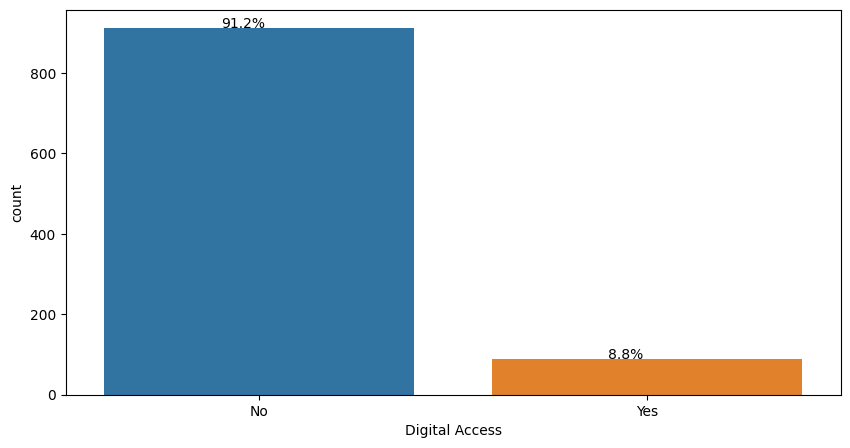

In [21]:


fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Digital Access', data=PH_data)
# Annotate percentage
total = len(PH_data['Digital Access'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y))
plt.show()